In [184]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


df = pd.read_csv('/Users/miaborko/Documents/epic3/Block3Epic/cleaned_data.csv')


In [185]:
#df.drop("Status", axis=1, inplace=True)
#df.drop("Marital Status", axis=1, inplace=True)
#df.drop("Race", axis=1, inplace=True)
df.drop("Differentiate", axis=1, inplace=True)



KeyError: "['Differentiate'] not found in axis"

In [ ]:
df.columns
df.head

<bound method NDFrame.head of       Race  Marital Status  T Stage  N Stage  6th Stage  A Stage  \
0        2               1        0        0          0        1   
1        2               1        1        1          2        1   
2        2               0        2        2          4        1   
3        2               1        0        0          0        1   
4        2               1        1        0          1        1   
...    ...             ...      ...      ...        ...      ...   
3886     1               1        0        0          0        1   
3887     2               0        1        1          2        1   
3888     2               1        1        0          1        1   
3889     0               0        1        0          1        1   
3890     2               1        1        0          1        1   

      Tumor Size (mm)  Estrogen Status  Regional Node Positive  \
0                   4                1                       1   
1                  35

In [ ]:
categorical_features = df.select_dtypes(include = "object").columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder
df.loc[df['Grade'] == 'anaplastic; Grade IV', 'Grade'] = 4
df[categorical_features] = df[categorical_features].apply(LabelEncoder().fit_transform) # Encoding all categorical features
df.drop("Grade", axis=1, inplace=True)


In [ ]:

numeric_cols = ['Age','Tumor Size (mm)','Regional Node Examined','Regional Node Positive','Survival Months']
categ_cols = ['N Stage','6th Stage','differentiate','Grade','A Stage','T Stage ','Estrogen Status','Progesterone Status']

In [ ]:
from sklearn.metrics import classification_report, log_loss
from sklearn.preprocessing import StandardScaler

#Using a threshold of 40 mm (4 cm) because usually after the tumor reaches that size it becomes fatal
threshold = 40
X = df.drop("Tumor Size (mm)", axis=1)
y = (df["Tumor Size (mm)"] > threshold).astype(int)  # binary target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]  # Probability of tumor growth beyond the threshold
logistic_loss = log_loss(y_test, y_pred_proba)

print("Logistic loss:", logistic_loss)





Accuracy: 0.9248313523931898
Logistic loss: 0.25294596533135727


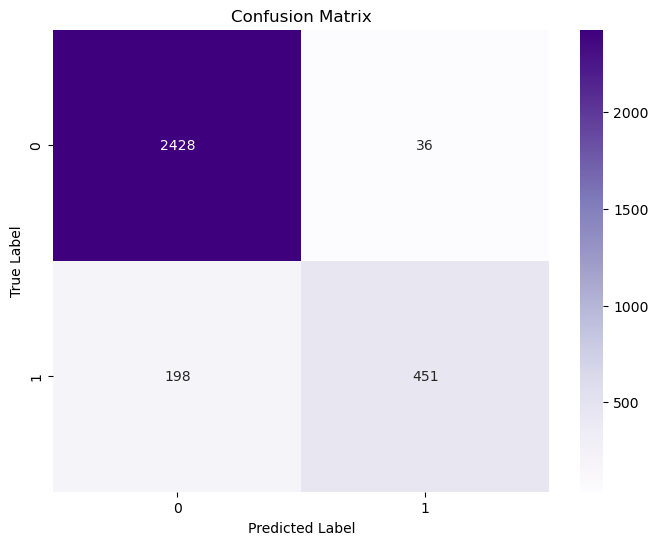

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#613 = predicted value is positive and it's actually positive
#109 = predicted value is negative and it's actually negative
#50 = predicted value is negative but it's positive
#7 = predicted value is positive but it's negative

In [ ]:
coefficients = logreg.coef_[0]
feature_importance = pd.DataFrame({'Column': X.columns, 'Importance': coefficients})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance)

                    Column  Importance
3                  T Stage    2.601617
4                  N Stage    0.498940
6                  A Stage    0.483287
7          Estrogen Status    0.314809
1                     Race    0.140823
11         Survival Months    0.081220
10  Regional Node Positive    0.037793
5                6th Stage   -0.065973
2           Marital Status   -0.106714
0                      Age   -0.113204
9   Regional Node Examined   -0.139011
8      Progesterone Status   -0.272972


In [ ]:
#df.drop("T Stage", axis=1, inplace=True)
#df.drop("6th Stage", axis=1, inplace=True)
df.drop("Progesterone Status", axis=1, inplace=True)
df.drop("Age", axis=1, inplace=True)
df.drop("Regional Node Examined", axis=1, inplace=True)

In [ ]:
from sklearn.metrics import classification_report, log_loss
from sklearn.preprocessing import StandardScaler

#Using a threshold of 40 mm (4 cm) because usually after the tumor reaches that size it becomes fatal
threshold = 40
X = df.drop("Tumor Size (mm)", axis=1)
y = (df["Tumor Size (mm)"] > threshold).astype(int)  # binary target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]  # Probability of tumor growth beyond the threshold
logistic_loss = log_loss(y_test, y_pred_proba)

print("Logistic loss:", logistic_loss)





Accuracy: 0.9241888853196274
Logistic loss: 0.25361274640997333


In [ ]:
# Cross validationb, optimization
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, log_loss

threshold = 40
X = df.drop("Tumor Size (mm)", axis=1)
y = (df["Tumor Size (mm)"] > threshold).astype(int)  
scaler = StandardScaler()
logreg = LogisticRegression(max_iter=10000, random_state=42)

# Create a KFold object with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Creating lists because there will be 5 of them
cv_accuracy_scores = []
cv_log_loss_scores = []

# Splitting it into 5 
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
 
    logreg.fit(X_train_scaled, y_train)
    
    # Making predictions 
    y_pred = logreg.predict(X_test_scaled)
    y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics and add them to the listss
    accuracy = accuracy_score(y_test, y_pred)
    log_loss_score = log_loss(y_test, y_pred_proba)
    
    cv_accuracy_scores.append(accuracy)
    cv_log_loss_scores.append(log_loss_score)

print("Cross-validation accuracy scores:", cv_accuracy_scores)
print("Mean cross-validation accuracy:", np.mean(cv_accuracy_scores))
print("Cross-validation log loss scores:", cv_log_loss_scores)
print("Mean cross-validation log loss:", np.mean(cv_log_loss_scores))


Cross-validation accuracy scores: [0.926829268292683, 0.9241645244215938, 0.922879177377892, 0.922879177377892, 0.9267352185089974]
Mean cross-validation accuracy: 0.9246974731958115
Cross-validation log loss scores: [0.2373440812332606, 0.24737024408767544, 0.25678530288015206, 0.25918441197475045, 0.2457793998027218]
Mean cross-validation log loss: 0.24929268799571208
